In [ ]:
import editdistance as ed
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

ps = PorterStemmer()
stop_words = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
mega_cluster = [['student','person','type','house'],['student','pers','typ','idea','set'],
                ['person','smith','house','cat','sell'],['car','florida','person','giant'],
                 ['mars','mansion','cat','type','he'],['orange','sell','cat','you']]

i = 0
for item in mega_cluster:
  item = list([w for w in item if w.lower() not in stop_words])
  mega_cluster[i] = item
  i += 1
lst = list()
for i in mega_cluster:
  sub_list = list()
  for j in i:
    sub_list.append(j)

  lst.append(sub_list)

In [ ]:
lst

[['student', 'person', 'type', 'house'],
 ['student', 'pers', 'typ', 'idea', 'set'],
 ['person', 'smith', 'house', 'cat', 'sell'],
 ['car', 'florida', 'person', 'giant'],
 ['mars', 'mansion', 'cat', 'type'],
 ['orange', 'sell', 'cat']]

In [ ]:
word_set = set(mega_cluster[0])

for i in range(1, len(mega_cluster)):
  word_set = word_set.union(set(mega_cluster[i]))

In [ ]:
word_set

{'car',
 'cat',
 'florida',
 'giant',
 'house',
 'idea',
 'mansion',
 'mars',
 'orange',
 'pers',
 'person',
 'sell',
 'set',
 'smith',
 'student',
 'typ',
 'type'}

In [ ]:
list_freq = list()
import numpy as np

for i in mega_cluster:
  word_set_cpy = dict.fromkeys(word_set, 0)
  for word in i:
    word_set_cpy[word] += 1

  for j in word_set_cpy:
    if word_set_cpy[j] >= 1:
      word_set_cpy[j] = np.log(word_set_cpy[j] + 1)

  list_freq.append(word_set_cpy)


In [ ]:
import pandas as pd
df = pd.DataFrame(list_freq)

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(df)
df['cluster'] = kmeans.labels_

In [ ]:
df

,idea,sell,florida,car,mansion,person,smith,student,giant,mars,typ,pers,type,set,house,orange,cat,cluster
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.693147,0.000000,0.000000,0
1,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.693147,0.000000,0.693147,0.000000,0.000000,0.000000,2
2,0.000000,0.693147,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.693147,1
3,0.000000,0.000000,0.693147,0.693147,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.693147,1
5,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,1


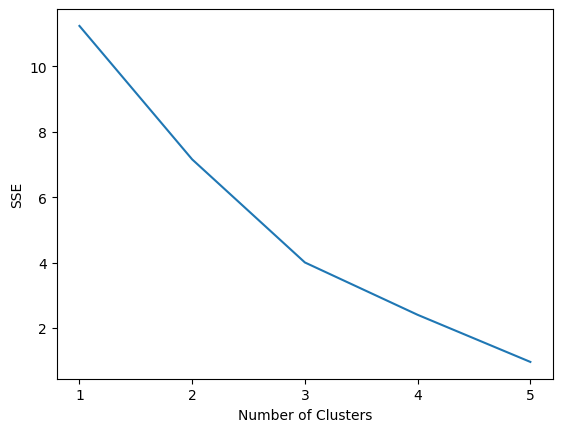

In [ ]:
sse = list()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 6), sse)
plt.xticks(range(1, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
#for each ERD:
#make an empty array
#first generate individualed images
#use OCR and retrieve text
#perf edit distance
#stem words
#add to this empty array

#with all these arrays, perform clustering KMeans++

